In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from areas_config import london_areas, non_london_areas, area_csv_path

In [2]:
date = '2025-06-08'

In [3]:
london_properties = pd.DataFrame()

for area, area_url in london_areas.items():
    area_df =  pd.read_csv(area_csv_path(area, date))
    area_df['area'] = area

    london_properties = pd.concat([london_properties, area_df])

#areas_stats= areas_stats[['area','beds','count','median','q25','q75','min','max']]
#areas_stats

In [4]:
non_properties = pd.DataFrame()

for area, area_url in non_london_areas.items():
    area_df =  pd.read_csv(area_csv_path(area, date))
    area_df['area'] = area

    non_properties = pd.concat([non_properties, area_df])

In [5]:
def get_area_stats(dataframe):
    return dataframe.groupby(['area','beds'])['price'].agg(
            count=('count'),
            median=('median'),
            q25=(lambda x: x.quantile(0.25)),
            q75=(lambda x: x.quantile(0.75)),
            min=('min'),
            max=('max')
            ).reset_index()

In [6]:
flat_property_types = [
    'Maisonette', 
    'Ground Flat',	
    'Flat',
    'Block of Apartments',
    'Apartment']

filter_property_types = [
    'Plot',
    'Land',
    'House Boat'
]

In [14]:
def filter_properties(df):
    return df[(df['beds'].isin([2,3])) & (~df['property_type'].isin(filter_property_types))].copy()

def filter_flat_properties(df):
        _df = filter_properties(df)
        return _df[(~_df['property_type'].isin(flat_property_types))].copy()


# London Properties

In [15]:
filtered_london_prop = filter_properties(london_properties)#london_properties[bed_mask(london_properties) & filter_mask].copy()
house_london_prop = filter_flat_properties(london_properties) #all_properties[bed_mask & filter_mask & flat_mask].copy()

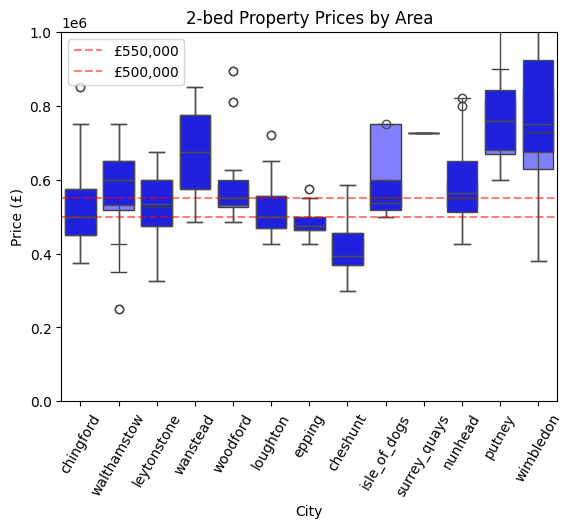

In [16]:
sns.boxplot(data=filtered_london_prop[filtered_london_prop['beds'] == 2], x='area', y='price', boxprops=dict(facecolor=(0, 0, 1, 0.5)))
sns.boxplot(data=house_london_prop[house_london_prop['beds'] == 2], x='area', y='price', color='blue')
plt.title('2-bed Property Prices by Area')
plt.xlabel('City')
plt.ylabel('Price (£)')
plt.ylim(0, 1_000_000)
plt.axhline(y=500_000, color='r', linestyle='--', alpha=0.5, label='£550,000')
plt.axhline(y=550_000, color='r', linestyle='--', alpha=0.5, label='£500,000')
plt.legend()
plt.xticks(rotation=60)
plt.show()

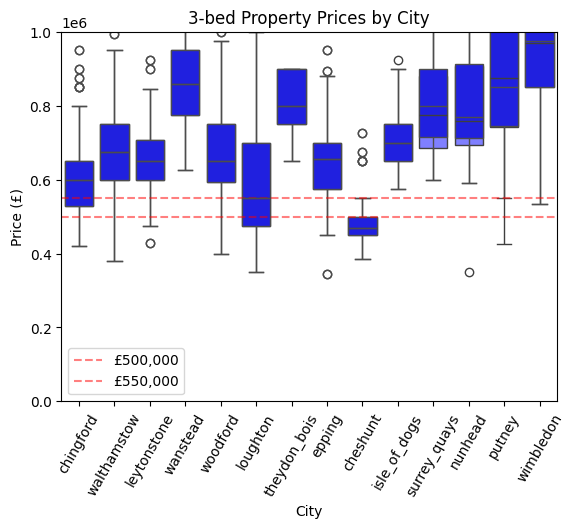

In [17]:
sns.boxplot(data=filtered_london_prop[filtered_london_prop['beds'] == 3], x='area', y='price', boxprops=dict(facecolor=(0, 0, 1, 0.5)))
sns.boxplot(data=house_london_prop[house_london_prop['beds'] == 3], x='area', y='price', color='blue')
plt.title('3-bed Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price (£)')
plt.ylim(0, 1_000_000)
plt.axhline(y=500_000, color='r', linestyle='--', alpha=0.5, label='£500,000')
plt.axhline(y=550_000, color='r', linestyle='--', alpha=0.5, label='£550,000')
plt.legend()
plt.xticks(rotation=60)
plt.show()

# Non London properties

In [18]:
filtered_non_prop = filter_properties(non_properties)#london_properties[bed_mask(london_properties) & filter_mask].copy()
house_non_prop = filter_flat_properties(non_properties) #all_properties[bed_mask & filter_mask & flat_mask].copy()

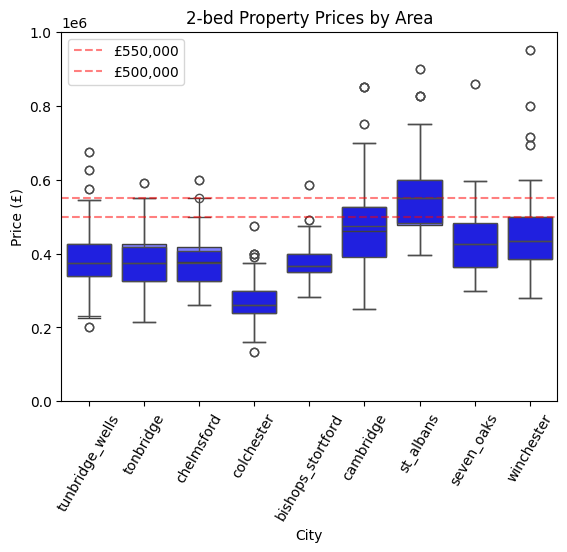

In [19]:
sns.boxplot(data=filtered_non_prop[filtered_non_prop['beds'] == 2], x='area', y='price', boxprops=dict(facecolor=(0, 0, 1, 0.5)))
sns.boxplot(data=house_non_prop[house_non_prop['beds'] == 2], x='area', y='price', color='blue')
plt.title('2-bed Property Prices by Area')
plt.xlabel('City')
plt.ylabel('Price (£)')
plt.ylim(0, 1_000_000)
plt.axhline(y=500_000, color='r', linestyle='--', alpha=0.5, label='£550,000')
plt.axhline(y=550_000, color='r', linestyle='--', alpha=0.5, label='£500,000')
plt.legend()
plt.xticks(rotation=60)
plt.show()

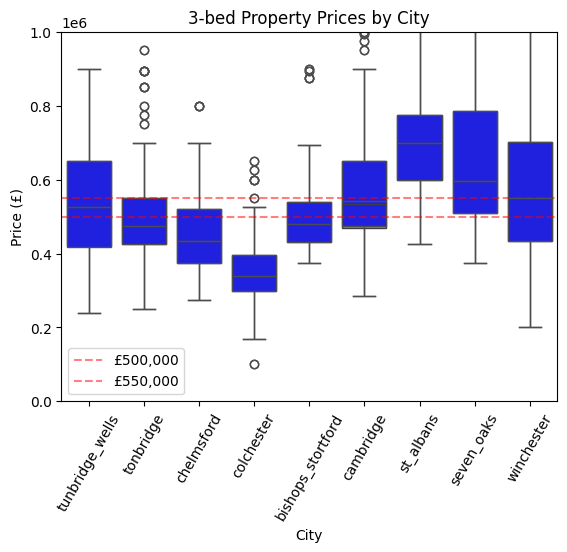

In [20]:
sns.boxplot(data=filtered_non_prop[filtered_non_prop['beds'] == 3], x='area', y='price', boxprops=dict(facecolor=(0, 0, 1, 0.5)))
sns.boxplot(data=house_non_prop[house_non_prop['beds'] == 3], x='area', y='price', color='blue')
plt.title('3-bed Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price (£)')
plt.ylim(0, 1_000_000)
plt.axhline(y=500_000, color='r', linestyle='--', alpha=0.5, label='£500,000')
plt.axhline(y=550_000, color='r', linestyle='--', alpha=0.5, label='£550,000')
plt.legend()
plt.xticks(rotation=60)
plt.show()